# Computer Vision - Assignment 0 - Introduction to OpenCV

#### Bonus: 4 points   |   Due date: September 30, 23:59   |   Submission site: https://pradogrado2223.ugr.es/

### Student's Full Name: <mark>Ignacio Garach Vélez</mark>

The first step is to connect with Google Drive and import the suitable libraries. 

In [1]:
#  We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive')
import os
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/MyDrive/images/',route)

Mounted at /content/drive


In [2]:
# We import the modules to use
import cv2
import numpy as np
from matplotlib import pyplot as plt
# With this backend, the output of plotting commands is displayed inline within 
# frontends like the Jupyter notebook, directly below the code cell that produced 
# it. The resulting plots will then also be stored in the notebook document.
# See https://ipython.readthedocs.io/en/stable/interactive/plotting.html
%matplotlib inline

# Exercise 1

Write a function (`readIm`) that reads an image file and displays it either in grayscale or color. `flagColor` is the variable that determines whether the image is displayed in grayscale or color. Depending on the value of `flagColor` we will have a grayscale image (if `0`) or a color image (if `1`). By default, omitting the `flagColor` parameter makes it `flagColor=1` (color). Show that the function works correctly by displaying one grayscale and one color image. 

#### Solution



El ejercicio se resuelve con una simple llamada al método de lectura de cv2 con el flag correspondiente. En el caso de imágenes tribanda las transformaremos a RGB y en adelante las trataremos teniendo en cuenta esto.


In [3]:
def readIm(filename, flagColor=1):
  im = cv2.imread(get_image(filename), flagColor)
  if flagColor == 1:
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) #Usaremos de forma consistente el esquema RGB
  return im

We display the color version of the `logoOpenCV.jpg` image (three channels: RGB in matplotlib or BGR in OpenCV)

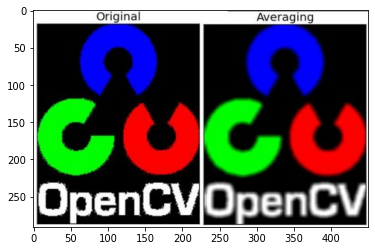

In [4]:
im_color = readIm(get_image('logoOpenCV.jpg'), 1)
plt.imshow(im_color)

We display the same image in grayscale (one channel).

Usamos el mapa de color de tonos de gris

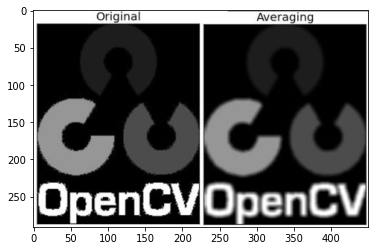

In [5]:
im_bn = readIm(get_image('logoOpenCV.jpg'), 0)
plt.imshow(im_bn, cmap='gray')

---

# Exercise 2

Write a function that displays an array of arbitrary real numbers (that must include positive and negative values). This function should handle images with one and three bands/channels. You have to display visual examples with random images and real images in both scenarios, one-channel (grayscale) and three-channels (RGB). Hint: band values have to be shifted and scaled in the proper range ([0,1]) to avoid information loss.

#### Solution

La función en primer lugar comprueba si la imagen está en escala de grises, para realizar la normalización en el único canal existente.

A continuación, dependiendo del flag_GLOBAL normaliza en función de todos los valores de los 3 canales o en caso negativo, canal por canal.

In [6]:
def rangeDisplay01(im, flag_GLOBAL):
  #check image type (grayscale or color)
  im = im.astype(np.float64)
  if len(np.shape(im)) == 2: #Las dimensiones indican que tiene un sólo canal y es grayscale
    # normalize the grayscale image
    min = np.min(im)
    max = np.max(im)
    range = max-min
    if range != 0:
      im = (im-min)/range
    else:
      im = 0
  # compute range and apply normalization
  else:
    if flag_GLOBAL:
      min = np.min(im)
      max = np.max(im)
      range = max-min
      if range != 0:
        im = (im-min)/range
      else:
        im = 0
    else:
      min = np.min(im, axis=(0, 1))
      max = np.max(im, axis=(0, 1))
      range = max-min
    # normalize each band as a grayscale image 
      for i in np.arange(3):
        if range[i] != 0:
          im[i] = (im[i]-min[i])/range[i]
        else:
          im[i] = 0

  return im

Let's write a function to display any image  with a title

In [10]:
def displayIm(im, title='',factor= 1, showFlag=True):  
  # Normalize range
  rangeDisplay01(im, 1)
  # Display the image
  if len(im.shape) == 3:
    # im has three channels
    plt.imshow(im.astype('uint8'))
  else:
    # im has a single channel
    plt.imshow(im, cmap='gray')

  print(im[1, 1].type())
  figure_size = plt.gcf().get_size_inches()
  plt.gcf().set_size_inches(factor * figure_size)
  plt.title(title) #adding title
  plt.xticks([]), plt.yticks([]) #axis label off
  if showFlag: plt.show()

Lets' test this function using both RGB and gray level images

In [12]:
rand_mono = (np.random.rand(50, 50)-0.5)*255
rand_multi = (np.random.rand(50, 50, 3)-0.5)*255

AttributeError: ignored

AttributeError: ignored

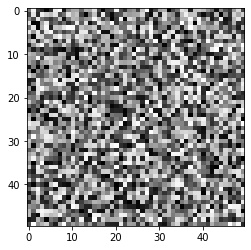

In [11]:
displayIm(rand_mono,'Random_Gray')

In [ ]:
displayIm(rand_multi, 'Random_Color')

Lets try with the real images given above. 

In [ ]:
displayIm(im_color)

In [ ]:
displayIm(im_bn)

---

# Exercise 3

Write a function that takes as input a sequence/list of images (`vim`) and display them simultaneously on the same canvas. Consider the following cases: (a) images with the same size and number of channels, (b) images with different sizes but the same number of channels, and (c) images with different size and number of channels. Show visual examples of the three scenarios. 

#### Solution

Case (a): the student can concatenate the images by rows and columns using the numpy functions vstack() and hstack().

Case (b): Here a good policy could be to insert the largest image in the upper left corner of the canvas and add new images from the left along the bottom and diagonal iteratively.

Case (c): Convert all single-channel images to three-channel images and go to case (b).

Students are allowed to create two functions (`displayMI_ES` and `displayMI_NES`) to separately tackle scenarios (a) and (b)-(c), respectively. 

**a)** Para este primer caso, vamos a fijar el número de imágenes por fila en 4 que parece razonable, igualmente lo mantendremos como parámetro en la función.

Calculamos en primer lugar el número de filas que serán necesarias para la cantidad de imágenes que tengamos, así como la cantidad de huecos que nos quedan libres en la última fila.

Dividimos las imágenes en grupos de 4 (la cantidad que se indique) y rellenamos los huecos de la última fila en negro. Concatenamos en horizontal las imágenes de cada fila con hconcat y finalmente las filas verticalmente con vconcat



In [ ]:
def displayMI_ES(vim, title='',factor=1, ixf=4):
  # Let's start with case (a). We concatenate the images by columns, or by rows 
  # and columns, depending on the number of images and their dimensions
  vim = np.array(vim)
  nim = len(vim)
  resto = nim % ixf
  fil = nim // ixf

  if resto!=0:
    ultimas = cv2.hconcat(vim[nim-resto:nim])                   #Separamos las últimas imágenes que necesitan rellenar huecos
    primeras = np.split(vim[0:nim-resto], fil) if fil!=0 else []#Dividimos en filas las imágenes
    filas = [cv2.hconcat(a) for a in primeras]                  #Concatenamos cada fila
    if nim>ixf:                                                 #En caso de que haya 1 sóla fila no es necesario rellenar con negro
      for i in range(ixf-resto):
        ultimas = cv2.hconcat([ultimas, np.zeros_like(vim[0])]) #Rellenamos los huecos con color negro
    filas.append(ultimas)
    out = cv2.vconcat(filas)                                    #Concatenamos las filas verticalmente
  else:
    primeras = np.split(vim, fil)
    filas = [cv2.hconcat(a) for a in primeras]
    out = cv2.vconcat(filas)

  return displayIm(out,title,factor)

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)

Let's display two different configurations

In [ ]:
imcolor_1 = readIm(get_image('yosemite1.jpg'))
imcolor_2 = readIm(get_image('yosemite2.jpg'))
imcolor_3 = readIm(get_image('yosemite3.jpg'))
imcolor_4 = readIm(get_image('yosemite4.jpg'))
imcolor_5 = readIm(get_image('yosemite5.jpg'))
vim=[imcolor_1, imcolor_2, imcolor_3]
displayMI_ES(vim)
vim=[imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3,imcolor_1, imcolor_2, imcolor_3,imcolor_4, imcolor_5, imcolor_3, imcolor_1]
displayMI_ES(vim)

Let us now consider the case of images with different sizes but the same number of channels. We can start by placing the first (the largest) in the top-left corner. Then we concatenate by columns and rows the rest of images.

**b)** La idea es simplemente adecuar las imágenes al tamaño de la mayor, rellenando los huecos para poder reducirnos al caso del apartado anterior.
Para esto calculamos los máximos de anchura y altura y rellenamos con la función copyMakeBorder

Además para adecuar que se puedan pasar imágenes tribanda y monobanda, se transforman las grises a 3 tribanda

In [ ]:
def tam(im):
  return im.shape[0]*im.shape[1]
def displayMI_NES(vim, rows=2):
  #Convert grayscale to 3-channel images if there's incongruence
  if np.any(np.array([True if len(im.shape)==3 else False for im in vim])):
    for im in vim:
      if len(im.shape)==2:
        cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
  #Sort the vim in size order
  vim.sort(key=tam)
  vim.reverse()

  #Calculamos la forma de la cuadrícula en función de las imágenes
  nim = len(vim)
  imxfila = int(nim/rows + 0.5)
  imxcolumn = int(nim/imxfila+0.5)

  #Calculamos los máximos de las anchuras y alturas para poder rellenar los huecos posteriormente
  mxr = np.zeros(imxfila, dtype=int)
  for i in range(nim):
    mxr[i//imxcolumn] = max(mxr[i//imxcolumn], vim[i].shape[0])
  maxrow = np.sum(mxr)
  mxc = np.zeros(imxcolumn, dtype=int)
  for i in range(nim):
    mxc[i%imxcolumn] = max(mxc[i%imxcolumn], vim[i].shape[1])
  maxcolumn = np.sum(mxc)

  black = np.zeros(len(vim[-1].shape))  #Color del borde
  for i in range(len(vim)): #En cada imagen ajustamos los huecos para que sean del mismo tamaño y podamos reducirnos al caso a)
    vim[i] = cv2.copyMakeBorder(vim[i], 0, mxr[i//imxcolumn]-vim[i].shape[0], 0, mxc[i%imxcolumn]-vim[i].shape[1], cv2.BORDER_CONSTANT, value=black)

#Creamos las filas con las imagenes en el nuevo orden
  canvas = []
  for i in range(imxfila):
    canvas.append(vim[imxcolumn*i:imxcolumn*(i+1)])


  outIm = cv2.hconcat(canvas[0])  #Apilamos las imágenes con bordes como en el primer apartado 
  for i in range(1, len(canvas)):
    row = cv2.hconcat(canvas[i])
    outIm = cv2.vconcat([outIm, row])
  return outIm[0:maxrow,0:maxcolumn,:]

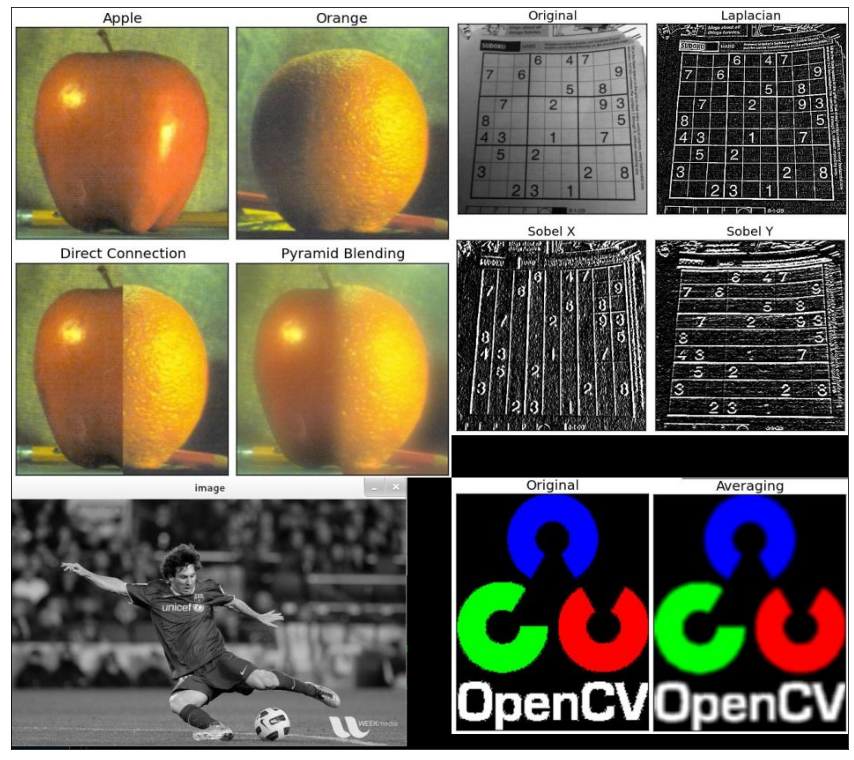

In [ ]:
imcolor_1 = readIm(get_image('dave.jpg'))
imcolor_2 = readIm(get_image('logoOpenCV.jpg'))
imcolor_3 = readIm(get_image('orapple.jpg'))
imcolor_4 = readIm(get_image('messi.jpg'))
vim=[imcolor_4,imcolor_3,imcolor_2,imcolor_1]
outIm=displayMI_NES(vim)
displayIm(outIm)

---

# Exercise 4

Write a function that modifies the color in an image for each of the pixel coordinates included in a list. Specifically, students must insert a green square with a side of 50 pixels in the center of the image. The key idea of this exercise is to understand how to modify the pixel values in an image (a 2D spatial array of pixels, where each pixel is defined by one (illumination in grayscale) or three values (RGB-color)).

#### Solution



La función changePixel simplemente actua sobre la lista de píxeles cambiando los colores de los mismos por cada uno de los indicados en nv en el mismo orden.

Para crear la lista de puntos del centro de la imagen, calculamos el comienzo restando la cantidad de píxeles a cambiar y partiendo la mitad de cada dimensión. Calculamos entonces la lista de píxeles y del color verde.

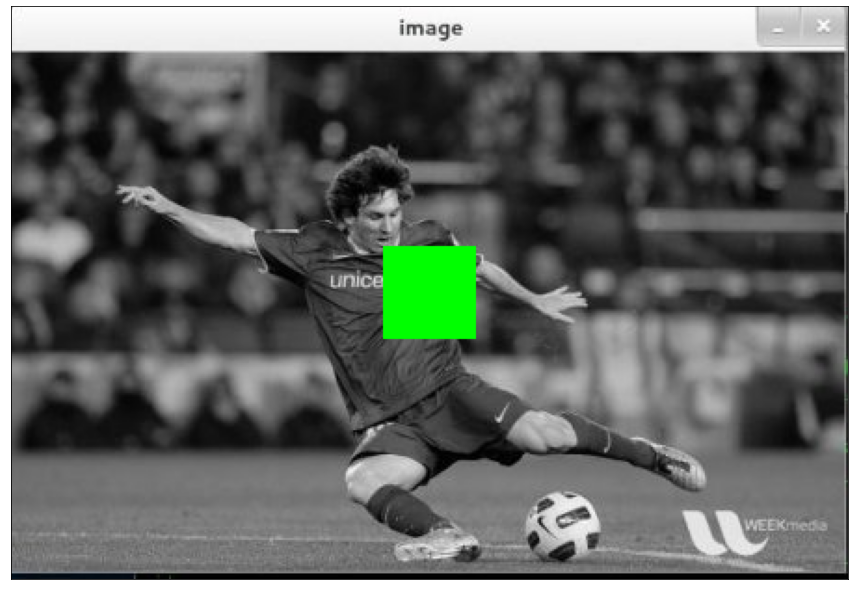

In [ ]:
def changePixelValues(im,cp,nv):
  # cp is a vector of pixel coordinates
  # nv is a vector with the new values
  # replace the values of cp with the nv values
  for i, p in enumerate(cp):
    im[p[0]][p[1]] = nv[i]
  return displayIm(im)

im = readIm(get_image('messi.jpg'))
# create the list of points with the requested shape
xb, yb = int((im.shape[0] - 50)/2), int((im.shape[1] - 50)/2)
lista = []
if xb<0:
  xb=0
if yb<0:
  yb=0
for i in range(xb, xb+50):
   for j in range(yb, yb+50):
     if i < im.shape[0] and j < im.shape[1]:
       lista.append((i, j))
verde = [0, 255, 0]
nv = [verde for a in lista]

changePixelValues(im, lista, nv) 

---

# Exercise 5

Write a function (`print_images_titles`) able to display multiple images, within the same canvas, including specific titles for each one of them. The main novelty of this exercise, with respect to Exercise 3, is the fact of adding a title for each subimage. `print_images_titles` is fed with a list of images and a list of titles. `matplotlib` functions like `add_subplot` or `subplot` can help in this regard.

#### Solution

Calculamos la disposición de las imágenes en función de la cantidad y del número de filas en el que deben disponerse y reservamos los subplots pertinentes. A continuación definimos los títulos y llamamos a la función del ejercicio 2.

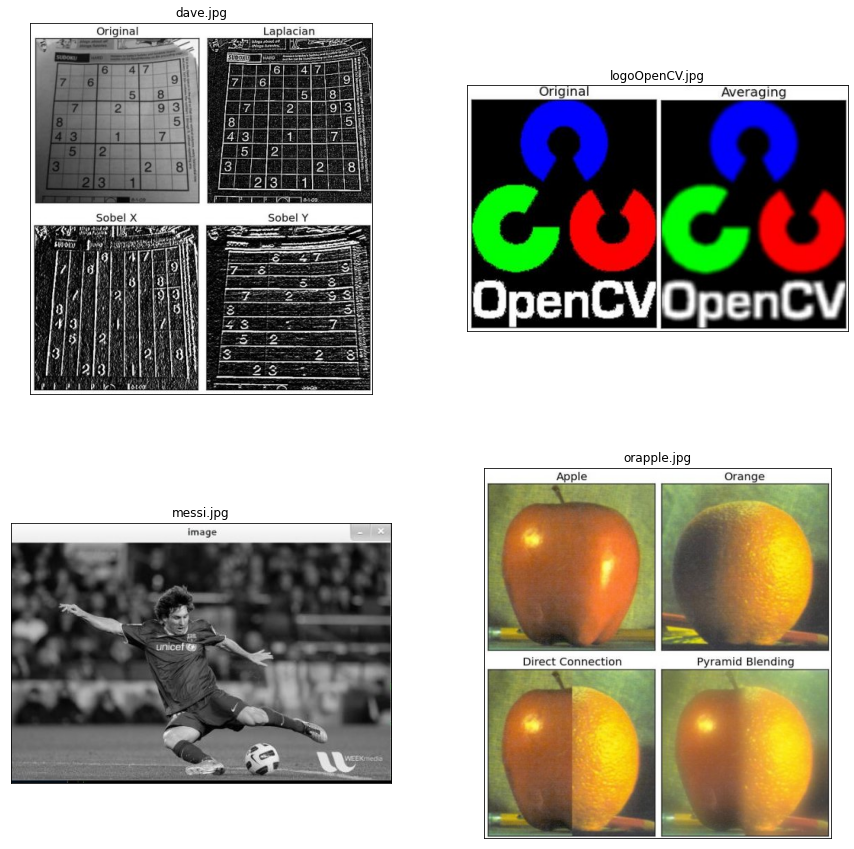

In [ ]:
def print_images_titles(vim, titles=None, rows=2):
  nim = len(vim)
  imxfila = int(nim/rows + 0.5)
  for i in range(nim):
    plt.subplot(rows, imxfila, i+1)
    if titles:
      plt.title(titles[i])
    displayIm(vim[i], title=titles[i], showFlag=False)
  plt.show()
im1 = readIm(get_image('dave.jpg'))
im2 = readIm(get_image('logoOpenCV.jpg'))
im3 = readIm(get_image('messi.jpg'))
im4 = readIm(get_image('orapple.jpg'))
vim = [im1, im2, im3, im4]    
titles = ['dave.jpg','logoOpenCV.jpg','messi.jpg','orapple.jpg']

print_images_titles(vim, titles)